In [1]:
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in csv file, originally downloaded from UCI Repo

diab = pd.read_csv('../data/diabetic_data.csv')

### Data preprocessing

In [3]:
# for clarity

diab.rename(columns={'change': 'change_diabetes_med'}, inplace=True)

In [4]:
# Replace '?' with nulls

diab.replace('?', np.nan, inplace=True)

In [5]:
# Dropping features

diab.drop(columns='weight', inplace=True) # drop weight column (97% missing)

diab.drop(columns=['encounter_id', 'patient_nbr'], inplace=True) # not relevant information

diab.drop(columns='citoglipton', inplace=True) # 0 people taking. No predictive value.
diab.drop(columns='examide', inplace=True) # 0 people taking. No predictive value.
diab.drop(columns='metformin-rosiglitazone', inplace=True) # 0 people taking. No predictive value.

diab.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True) # Thousands of possibilities, hard to interpret

diab = diab[diab['gender'] != 'Unknown/Invalid'] # Drop 3 rows with 'invalid' gender

In [6]:
# Fill null values of categorical features with 'Unknown'

diab['race'] = diab['race'].fillna('Unknown') 
diab['payer_code'] = diab['payer_code'].fillna('Unknown')
diab['medical_specialty'] = diab['medical_specialty'].fillna('Unknown')

In [7]:
# Replace 'No' with 0. Replace 'Ch' and 'Yes' with 1. 

diab = diab.replace(to_replace=['No', 'Ch', 'Yes'], value=[0, 1, 1]) 

### Remove patients who can't be readmitted due to death, hospice care, or prolonged inpatient stay

In [8]:
no_readmit = diab['discharge_disposition_id'].isin([5, 8, 9, 11, 12, 13, 14, 19, 20, 21, 23, 24])
diab = diab.loc[~no_readmit]

### Label Discharge ID's

In [9]:
# Make new column "Discharged_to" that maps Discharge IDs to understandable outcomes
# ~ 88% of patients are discharged home or to an SNF 

diab.loc[diab['discharge_disposition_id'] == 27, 'Discharged_to'] = 'Federal_health_care_facility'
diab.loc[diab['discharge_disposition_id'] == 10, 'Discharged_to'] = 'Neonate_hospital'
diab.loc[diab['discharge_disposition_id'] == 16, 'Discharged_to'] = 'Outside_outpatient_services'
diab.loc[diab['discharge_disposition_id'] == 17, 'Discharged_to'] = 'Inhouse_outpatient_services'
diab.loc[diab['discharge_disposition_id'] == 15, 'Discharged_to'] = 'Medicare_approved_swingbed'
diab.loc[diab['discharge_disposition_id'] == 28, 'Discharged_to'] = 'Psychiatric_hospital'
diab.loc[diab['discharge_disposition_id'] == 7, 'Discharged_to'] = 'Against_medical_advice***'
diab.loc[diab['discharge_disposition_id'] == 4, 'Discharged_to'] = 'Intermediate_care_facility'
diab.loc[diab['discharge_disposition_id'] == 25, 'Discharged_to'] = 'Info_unavailable'
diab.loc[diab['discharge_disposition_id'] == 22, 'Discharged_to'] = 'Rehab_facility'
diab.loc[diab['discharge_disposition_id'] == 2, 'Discharged_to'] = 'Another_short_term_hospital'
diab.loc[diab['discharge_disposition_id'] == 18, 'Discharged_to'] = 'NULL'
diab.loc[diab['discharge_disposition_id'] == 6, 'Discharged_to'] = 'Home_with_home_health_service'
diab.loc[diab['discharge_disposition_id'] == 3, 'Discharged_to'] = 'Skilled_nursing_facility'
diab.loc[diab['discharge_disposition_id'] == 1, 'Discharged_to'] = 'Home' # ~ 61% of patients discharged home w/o services

In [10]:
diab.drop(columns='discharge_disposition_id', inplace=True) # drop the original column

### Reformat Age Values

In [11]:
# For readability purposes

diab.loc[diab['age'] == '[70-80)', 'age'] = '70-80'
diab.loc[diab['age'] == '[60-70)', 'age'] = '60-70'
diab.loc[diab['age'] == '[50-60)', 'age'] = '50-60'
diab.loc[diab['age'] == '[80-90)', 'age'] = '80-90'
diab.loc[diab['age'] == '[40-50)', 'age'] = '40-50'
diab.loc[diab['age'] == '[30-40)', 'age'] = '30-40'
diab.loc[diab['age'] == '[90-100)', 'age'] = '90-100'
diab.loc[diab['age'] == '[20-30)', 'age'] = '20-30'
diab.loc[diab['age'] == '[10-20)', 'age'] = '10-20'
diab.loc[diab['age'] == '[0-10)', 'age'] = '0-10'

### Label Admission Type ID's

In [12]:
# Make new column "admission_type" that maps numerical ID's to understandable admission type information 
# ~ 70% of encounters are tagged 'emergency' or 'urgent'

diab.loc[diab['admission_type_id'] == 1, 'admission_type'] = 'Emergency' # 53% of admissions are emergency visits
diab.loc[diab['admission_type_id'] == 3, 'admission_type'] = 'Elective'
diab.loc[diab['admission_type_id'] == 2, 'admission_type'] = 'Urgent'
diab.loc[diab['admission_type_id'] == 6, 'admission_type'] = 'NULL'
diab.loc[diab['admission_type_id'] == 5, 'admission_type'] = 'Not_available'
diab.loc[diab['admission_type_id'] == 8, 'admission_type'] = 'Not_mapped'
diab.loc[diab['admission_type_id'] == 7, 'admission_type'] = 'Trauma_center'
diab.loc[diab['admission_type_id'] == 4, 'admission_type'] = 'Newborn'

In [13]:
diab.drop(columns='admission_type_id', inplace=True) # drop the original column

### Label Admission Source ID's

In [14]:
# Make new column "admission_source" that maps numerical ID's to understandable admission source information
# ~85% of patients come via ER or physician referral

diab.loc[diab['admission_source_id'] == 7, 'admission_source'] = 'Emergency_room' # ~56% for ER visit
diab.loc[diab['admission_source_id'] == 1, 'admission_source'] = 'Physician_referral'
diab.loc[diab['admission_source_id'] == 17, 'admission_source'] = 'NULL'
diab.loc[diab['admission_source_id'] == 4, 'admission_source'] = 'Transfer_from_hospital'
diab.loc[diab['admission_source_id'] == 6, 'admission_source'] = 'Transfer_from_other_healthcare_facility'
diab.loc[diab['admission_source_id'] == 2, 'admission_source'] = 'Clinic_referral'
diab.loc[diab['admission_source_id'] == 5, 'admission_source'] = 'Transfer_from_SNF'
diab.loc[diab['admission_source_id'] == 3, 'admission_source'] = 'HMO_referral'
diab.loc[diab['admission_source_id'] == 20, 'admission_source'] = 'Not_mapped'
diab.loc[diab['admission_source_id'] == 9, 'admission_source'] = 'Not_available'
diab.loc[diab['admission_source_id'] == 8, 'admission_source'] = 'Law_enforcement'
diab.loc[diab['admission_source_id'] == 22, 'admission_source'] = 'Transfer_from_inpatient_care_from_same_facility'
diab.loc[diab['admission_source_id'] == 10, 'admission_source'] = 'Transfer_from_critical_access_hospital'
diab.loc[diab['admission_source_id'] == 11, 'admission_source'] = 'Normal_delivery'
diab.loc[diab['admission_source_id'] == 14, 'admission_source'] = 'Extramural_birth'
diab.loc[diab['admission_source_id'] == 25, 'admission_source'] = 'Transfer_from_ambulatory_surgery'
diab.loc[diab['admission_source_id'] == 13, 'admission_source'] = 'Sick_baby'

In [15]:
diab.drop(columns='admission_source_id', inplace=True) # drop the original column

### Define target variable

In [16]:
# 12-13% of patients are readmitted within 30 days

diab['readmitted'].value_counts()

NO     51608
>30    34952
<30    11004
Name: readmitted, dtype: int64

In [17]:
# Define target "positive" variable to be readmission within 30 days

diab['readmitted_within_30days'] = (diab['readmitted'] == '<30').astype(int)

In [18]:
diab['readmitted_within_30days'].value_counts()

0    86560
1    11004
Name: readmitted_within_30days, dtype: int64

In [19]:
# Don't want model to 'cheat'

diab.drop(columns='readmitted', inplace=True)

In [20]:
# Export to CSV (before one-hot encoding and other feature engineering) 

# diab.to_csv('Diabetes_1.csv', index=False)

### EDA

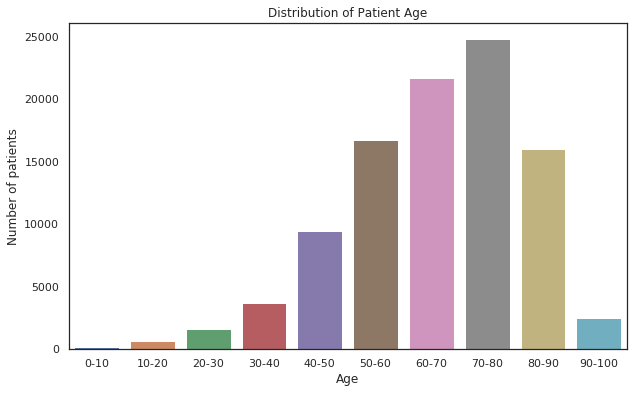

In [21]:
# Distribution of patient age

plt.figure(figsize=(10, 6))

ax = sns.countplot(diab['age'])

ax.set(xlabel='Age',
       ylabel='Number of patients', 
       title='Distribution of Patient Age');

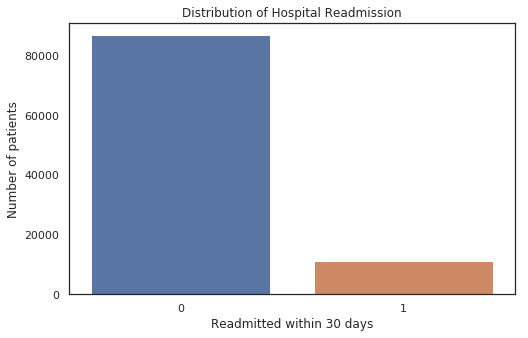

In [22]:
# Hospital readmission rate

plt.figure(figsize=(8, 5))

ax = sns.countplot(diab['readmitted_within_30days'])

ax.set(xlabel='Readmitted within 30 days',
       ylabel='Number of patients',
       title='Distribution of Hospital Readmission');

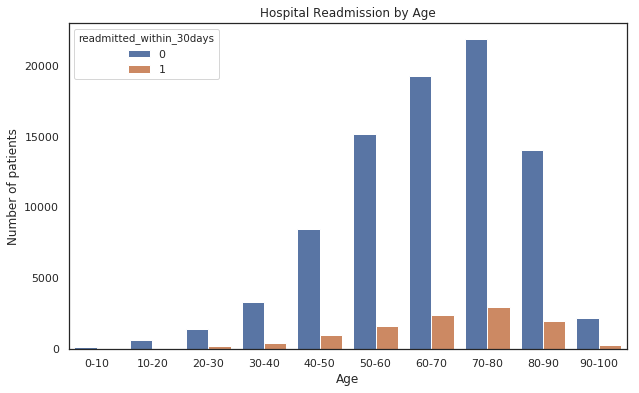

In [23]:
# Readmission by age of patient

plt.figure(figsize=(10, 6))

ax = sns.countplot(diab['age'], hue=diab['readmitted_within_30days'])

ax.set(xlabel='Age',
       ylabel='Number of patients',
       title='Hospital Readmission by Age');

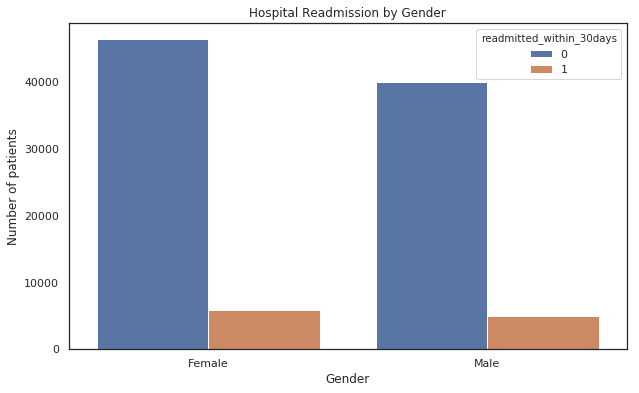

In [24]:
# Readmission by gender of patient

plt.figure(figsize=(10, 6))

ax = sns.countplot(diab['gender'], hue=diab['readmitted_within_30days'])

ax.set(xlabel='Gender',
       ylabel='Number of patients',
       title='Hospital Readmission by Gender');

### Why is A1C test so often not administered?

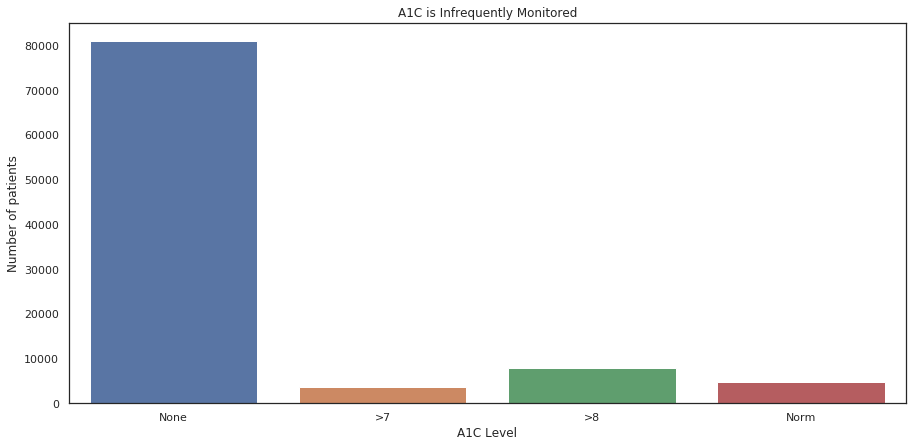

In [25]:
# How often is A1C measured?
# A1C is a sound measure of a patient's blood glucose level over the past 2-3 months. 
# Very important for diabetes monitoring.
# This chart reflects how often this simple test is overlooked during patient's initial hospitalization. 

plt.figure(figsize=(15, 7))

ax = sns.countplot(diab['A1Cresult'])

ax.set(xlabel='A1C Level',
       ylabel='Number of patients',
       title='A1C is Infrequently Monitored');

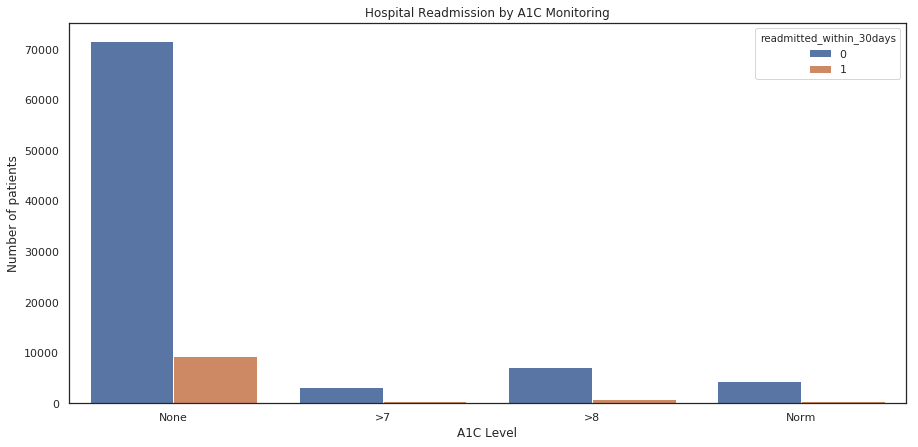

In [26]:
# Readmission by A1C Monitoring

plt.figure(figsize=(15, 7))

ax = sns.countplot(diab['A1Cresult'], hue=diab['readmitted_within_30days'])

ax.set(xlabel='A1C Level',
       ylabel='Number of patients',
       title='Hospital Readmission by A1C Monitoring');

In [43]:
# Higher likelihood of readmission within 30 days when released to
# rehab facility (28%) than those who left "against medical advice" (14%)

diab.groupby(['Discharged_to', 'readmitted_within_30days']).count().reset_index().head()

,Discharged_to,readmitted_within_30days,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change_diabetes_med,diabetesMed,admission_type,admission_source
0,Against_medical_advice***,0,533,533,533,533,533,533,533,533,...,533,533,533,533,533,533,533,533,533,533
1,Against_medical_advice***,1,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
2,Another_short_term_hospital,0,1786,1786,1786,1786,1786,1786,1786,1786,...,1786,1786,1786,1786,1786,1786,1786,1786,1786,1786
3,Another_short_term_hospital,1,342,342,342,342,342,342,342,342,...,342,342,342,342,342,342,342,342,342,342
4,Federal_health_care_facility,0,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [28]:
# More prior inpatient encounters =  higher chance of readmission within 30 days

diab.groupby(['number_inpatient', 'readmitted_within_30days']).count().head()

race  gender    age  \
number_inpatient readmitted_within_30days                         
0                0                         59561   59561  59561   
                 1                          5518    5518   5518   
1                0                         16194   16194  16194   
                 1                          2441    2441   2441   
2                0                          5887    5887   5887   

                                           time_in_hospital  payer_code  \
number_inpatient readmitted_within_30days                                 
0                0                                    59561       59561   
                 1                                     5518        5518   
1                0                                    16194       16194   
                 1                                     2441        2441   
2                0                                     5887        5887   

                                           medical_specialty  \
number_inpatient readmitted_within_30days                      
0                0                                     59561   
                 1                                      5518   
1                0                                     16194   
                 1                                      2441   
2                0                                      5887   

                                           num_lab_procedures  num_procedures  \
number_inpatient readmitted_within_30days                                       
0                0                                      59561           59561   
                 1                                       5518            5518   
1                0                                      16194           16194   
                 1                                       2441            2441   
2                0                                       5887            5887   

                                           num_medications  number_outpatient  \
number_inpatient readmitted_within_30days                                       
0                0                                   59561              59561   
                 1                                    5518               5518   
1                0                                   16194              16194   
                 1                                    2441               2441   
2                0                                    5887               5887   

                                                 ...         insulin  \
number_inpatient readmitted_within_30days        ...                   
0                0                               ...           59561   
                 1                               ...            5518   
1                0                               ...           16194   
                 1                               ...            2441   
2                0                               ...            5887   

                                           glyburide-metformin  \
number_inpatient readmitted_within_30days                        
0                0                                       59561   
                 1                                        5518   
1                0                                       16194   
                 1                                        2441   
2                0                                        5887   

                                           glipizide-metformin  \
number_inpatient readmitted_within_30days                        
0                0                                       59561   
                 1                                        5518   
1                0                                       16194   
                 1                                        2441   
2                0                                        5887   

                                

In [29]:
# More prior emergency encounters = higher chance of readmission within 30 days

diab.groupby(['number_emergency', 'readmitted_within_30days']).count().reset_index().head()

,number_emergency,readmitted_within_30days,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change_diabetes_med,diabetesMed,Discharged_to,admission_type,admission_source
0,0,0,77476,77476,77476,77476,77476,77476,77476,77476,...,77476,77476,77476,77476,77476,77476,77476,77476,77476,77476
1,0,1,9152,9152,9152,9152,9152,9152,9152,9152,...,9152,9152,9152,9152,9152,9152,9152,9152,9152,9152
2,1,0,6291,6291,6291,6291,6291,6291,6291,6291,...,6291,6291,6291,6291,6291,6291,6291,6291,6291,6291
3,1,1,1078,1078,1078,1078,1078,1078,1078,1078,...,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078
4,2,0,1586,1586,1586,1586,1586,1586,1586,1586,...,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586


### One hot encoding

In [30]:
# All categorical featurese

cats = ['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'admission_type', 'Discharged_to', 'admission_source',
        'payer_code', 'medical_specialty', 'change_diabetes_med', 'diabetesMed', 'insulin', 'metformin', 'glipizide',
        'glyburide', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'tolbutamide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin',
        'metformin-pioglitazone', 'acetohexamide', 'glimepiride-pioglitazone', 'readmitted_within_30days']

df_cat = pd.get_dummies(diab[cats])

### Numerical variables

In [31]:
nums = ['number_outpatient', 'number_inpatient', 'number_emergency', 'number_diagnoses',
        'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications']

df_num = diab[nums]

### Concatenate numerical and categorical DataFrames into master DataFrame

In [32]:
df = pd.concat([df_num, df_cat], axis=1)

In [33]:
# Move target variable to the final column for readability purposes

target = df.pop('readmitted_within_30days')
df['readmitted_within_30days'] = target

In [34]:
# Rename columns to avoid XGBoost error

df.rename(columns={'max_glu_serum_>200': 'max_glu_serum_greater_200',
                     'max_glu_serum_>300': 'max_glu_serum_greater_300',
                     'A1Cresult_>7': 'A1Cresult_greater_7',
                     'A1Cresult_>8': 'A1Cresult_greater_8',
                      }, inplace=True)

### EDA part 2

In [35]:
# Cursory glance at which factors influence readmission rates

df.groupby(['readmitted_within_30days']).mean()

,number_outpatient,number_inpatient,number_emergency,number_diagnoses,time_in_hospital,num_lab_procedures,num_procedures,num_medications,change_diabetes_med,diabetesMed,...,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_0,glipizide-metformin_Steady,metformin-pioglitazone_0,metformin-pioglitazone_Steady,acetohexamide_0,acetohexamide_Steady,glimepiride-pioglitazone_0,glimepiride-pioglitazone_Steady
readmitted_within_30days,,,,,,,,,,,,,,,,,,,,,
0,0.362835,0.554286,0.178674,7.361114,4.298972,42.675716,1.341751,15.821003,0.460860,0.768403,...,0.006966,0.000092,0.999861,0.000139,0.999988,0.000012,0.999988,0.000012,0.999988,0.000012
1,0.441839,1.231189,0.361778,7.699836,4.752090,44.203835,1.287804,16.893857,0.490004,0.802254,...,0.006634,0.000000,0.999909,0.000091,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000


### Simply testing A1C levels may lower readmission rates 

In [36]:
# Patients who are readmitted in < 30 days are LESS likely to have had A1C measured 
# than those who were not readmitted in < 30 days.

df.groupby(['readmitted_within_30days'])['A1Cresult_None'].mean()

readmitted_within_30days
0    0.827923
1    0.852781
Name: A1Cresult_None, dtype: float64

In [37]:
# Patients who are readmitted in < 30 days are LESS likely to have had a normal A1C result
# than those who were not readmitted in < 30 days 

df.groupby(['readmitted_within_30days'])['A1Cresult_Norm'].mean()

readmitted_within_30days
0    0.050578
1    0.042439
Name: A1Cresult_Norm, dtype: float64

### Pickle

In [45]:
# pickle for modeling in separate Jupyter Notebook

with open('../pickles-csv/df.pkl', 'wb') as f:
    pickle.dump(df, f)